In [277]:
import numpy as np
import pandas as pd
import math
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.formula.api import glm

#import folium # package for making maps, please make sure to use a version older than 1.0..



In [184]:
df=pd.read_csv('Final_Final.csv')
lights=pd.read_csv('lights_clean.csv')
list_df=[]
x_df=[]
y_df=[]
for i in range(df.shape[0]):
    address=str(round(df['LATITUD'].iloc[i],7))+' '+str(round(df['LONGITUD'].iloc[i],7))
    list_df.append(address)   
    
df['LAT_LON']=list_df
df['ID']=df['BUS_SUBIDA']


newdf=df[['LAT_LON','ID','BUS_SUBIDA','BUS_BAJADA','TRAFICO','POT','PIEZA_URBANA','LATITUD','LONGITUD']]

In [185]:
dff=newdf.groupby(['LAT_LON']).count().reset_index()
list_df=[]
for i in range(dff.shape[0]):
    list_df.append(np.array(newdf[newdf['LAT_LON']==dff['LAT_LON'].iloc[i]]).tolist()[0])



In [186]:
final_df = pd.DataFrame.from_records(list_df)
final_df=final_df.rename(columns={0:'LAT_LON',1:'ID',2:'BUS_SUBIDA',3:'BUS_BAJADA',4:'TRAFICO',5:'POT',6:'PIEZA_URBANA',7:'LATITUD',8:'LONGITUD'})
final_df['ID']=dff['ID']
final

In [347]:
closest=np.zeros(final_df.shape[0])
numclose=np.zeros(final_df.shape[0])
numclose2=np.zeros(final_df.shape[0])
numclose3=np.zeros(final_df.shape[0])
for i in range(final_df.shape[0]):
    corner_lat=final_df['LATITUD'][i]
    corner_lon=final_df['LONGITUD'][i]
    light_lat=np.array(lights['LATITUD'])
    light_lon=np.array(lights['LONGITUD'])
    dx = (light_lon-corner_lon)*40000*np.cos((light_lat+corner_lat)*math.pi/360)/360
    dy = (light_lat-corner_lat)*40000/360
    distance=np.sqrt(dx**2+dy**2)
    closest[i]=distance[distance.argmin()]
    numclose[i]=sum(distance<0.1)
    numclose2[i]=sum(((distance>=0.1) & (distance<0.5)))
    numclose3[i]=sum(((distance>=0.5) & (distance<2)))
final_df['NLIGHTS']=list(numclose)
final_df['NLIGHTS2']=list(numclose2)
final_df['NLIGHTS3']=list(numclose3)

final_df['CLOSEST_LIGHT']=list(closest)
data=final_df.drop(columns=['LAT_LON','LONGITUD','LATITUD'])
data=data.rename(columns={'ID':'NACCIDENTS'})

In [349]:
formula='NACCIDENTS~BUS_SUBIDA+BUS_BAJADA+TRAFICO+POT+PIEZA_URBANA+NLIGHTS+NLIGHTS2+NLIGHTS3+CLOSEST_LIGHT'
mod1 = glm(formula=formula, data=data, family=sm.families.Poisson()).fit()
mod1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             NACCIDENTS   No. Observations:                 6056
Model:                            GLM   Df Residuals:                     6034
Model Family:                 Poisson   Df Model:                           21
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -23054.
Date:                Wed, 27 Nov 2019   Deviance:                       30357.
Time:                        10:04:42   Pearson chi2:                 6.33e+04
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
Intercept                                1.5132      0.047     32.432      0.000       1.422       1.605
POT[T.comercial]                         0.1981      0.028      7.035      0.000       0.143       0.253
POT[T.industrial]                        0.4391      0.042     10.533      0.000       0.357       0.521
POT[T.ninguna]                          -0.0261      0.032     -0.824      0.410      -0.088       0.036
POT[T.portuaria]                        -0.3580      0.078     -4.581      0.000      -0.511      -0.205
POT[T.protegida]                        -0.0046      0.043     -0.107      0.915      -0.089       0.080
POT[T.residencial]                      -0.2855      0.030     -9.410      0.000      -0.345      -0.226
PIEZA_URBANA[T.centro metropolitana]    -0.1971      0.035     -5.675      0.000      -0.265      -0.129
PIEZA_URBANA[T.ninguna]                 -0.0135      0.061     -0.221      0.825      -0.133       0.106
PIEZA_URBANA[T.prado norte]             -0.0517      0.030     -1.716      0.086      -0.111       0.007
PIEZA_URBANA[T.ribera occidental]        0.3904      0.040      9.837      0.000       0.313       0.468
PIEZA_URBANA[T.riomar]                   0.2107      0.026      7.978      0.000       0.159       0.262
PIEZA_URBANA[T.suroccidental 1]         -0.2062      0.040     -5.167      0.000      -0.284      -0.128
PIEZA_URBANA[T.suroccidental 2]         -0.0392      0.041     -0.956      0.339      -0.120       0.041
PIEZA_URBANA[T.suroriental]             -0.0463      0.031     -1.500      0.134      -0.107       0.014
BUS_SUBIDA                              -0.1429      0.009    -15.433      0.000      -0.161      -0.125
BUS_BAJADA                               0.0520      0.010      5.361      0.000       0.033       0.071
TRAFICO                                 -0.0469      0.036     -1.296      0.195      -0.118       0.024
NLIGHTS                                  0.1183      0.012      9.519      0.000       0.094       0.143
NLIGHTS2                                -0.0090      0.002     -3.923      0.000      -0.013      -0.004
NLIGHTS3                                -0.0016      0.000     -4.783      0.000      -0.002      -0.001
CLOSEST_LIGHT                            0.0022      0.016      0.140      0.889      -0.028       0.033
========================================================================================================
"""

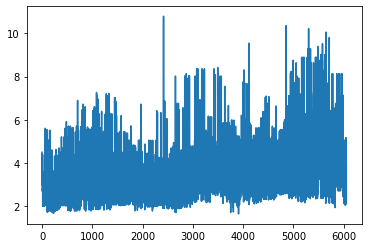

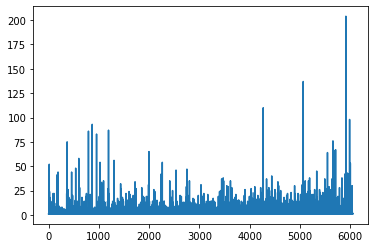

In [339]:
mod1.predict()
plt.plot(list(mod1.predict()))
plt.show()
plt.plot(data['NACCIDENTS'])
plt.show()